<a href="https://colab.research.google.com/github/paulmachau/-project-1/blob/main/Copy_of_Movie_titles_and_popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('tmdb.movies.csv')

In [ ]:
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
# the drop() method is used to remove the specified columns 
df.drop(['Unnamed: 0', 'genre_ids', 'title', 'vote_count'], axis=1, inplace=True)


In [ ]:
df.head(10)

,id,original_language,original_title,popularity,release_date,vote_average
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7
2,10138,en,Iron Man 2,28.515,2010-05-07,6.8
3,862,en,Toy Story,28.005,1995-11-22,7.9
4,27205,en,Inception,27.920,2010-07-16,8.3
5,32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1
6,19995,en,Avatar,26.526,2009-12-18,7.4
7,10193,en,Toy Story 3,24.445,2010-06-17,7.7
8,20352,en,Despicable Me,23.673,2010-07-09,7.2
9,38055,en,Megamind,22.855,2010-11-04,6.8


In [ ]:
#removing duplicates from the columns
df.drop_duplicates(inplace=True)

In [ ]:
#Check for missing values: Use the isnull() method 
df.isnull().sum()


id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
dtype: int64

In [ ]:
#Drop missing values: If there are missing values, they can be dropped using the dropna() method.
df.dropna(inplace=True)


In [ ]:
#Convert data types: Use the astype() method to convert data types of columns.
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df.head()

,id,original_language,original_title,popularity,release_date,vote_average
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7
2,10138,en,Iron Man 2,28.515,2010-05-07,6.8
3,862,en,Toy Story,28.005,1995-11-22,7.9
4,27205,en,Inception,27.920,2010-07-16,8.3


In [ ]:
#changing the vote average column so as to be more descriptive
df = df.rename(columns={'vote_average': 'average_rating'})


In [ ]:
df.head()

,id,original_language,original_title,popularity,release_date,average_rating
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7
2,10138,en,Iron Man 2,28.515,2010-05-07,6.8
3,862,en,Toy Story,28.005,1995-11-22,7.9
4,27205,en,Inception,27.920,2010-07-16,8.3


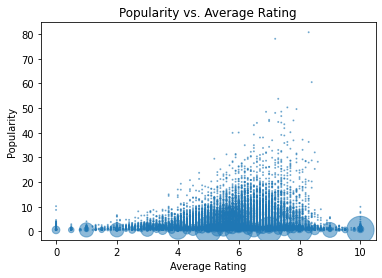

In [ ]:
import matplotlib.pyplot as plt

# group DataFrame by 'average_rating' and 'popularity', count occurrences for each combination
grouped = df.groupby(['average_rating', 'popularity']).size().reset_index(name='count')

# create scatterplot of popularity against average rating, where size of points represents count
plt.scatter(grouped['average_rating'], grouped['popularity'], s=grouped['count'], alpha=0.5)
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.title('Popularity vs. Average Rating')
plt.show()

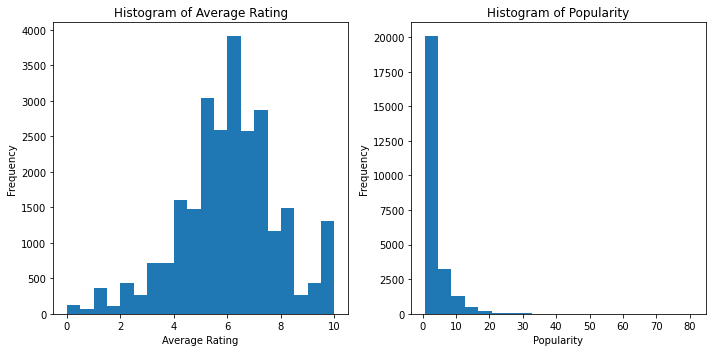

In [ ]:
import matplotlib.pyplot as plt

# create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create histogram of 'average_rating' in the first subplot
axs[0].hist(df['average_rating'], bins=20)
axs[0].set_xlabel('Average Rating')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Average Rating')

# create histogram of 'popularity' in the second subplot
axs[1].hist(df['popularity'], bins=20)
axs[1].set_xlabel('Popularity')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Popularity')

# adjust layout and display plot
plt.tight_layout()
plt.show()

